In [3]:
%reload_ext autoreload
%autoreload 2

import vtk
from vtk.util import numpy_support

import numpy as np
import bloscpack as bp

import sys
import os
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from annotation_utilities import *

from skimage.measure import mesh_surface_area, marching_cubes, correct_mesh_orientation

from itertools import izip
import pandas as pd

import time

import matplotlib.pyplot as plt
%matplotlib inline

from vis3d_utilities import *

In [2]:
with open('colors.txt', 'r') as f:
    colors = {l[0]: np.r_[float(l[1]), float(l[2]), float(l[3])] for l in map(lambda x: x.split(), f.readlines())}

In [5]:
stack = 'MD594'

In [ ]:
# render outerContour

In [ ]:
from registration_utilities import *

In [8]:
# load in annotation space
vertices, faces = load_mesh_stl(mesh_rootdir + "/%(stack)s/%(stack)s_%(name)s_gaussianSmoothed.stl" % \
                                {'stack': stack, 'name': 'outerContour'})

In [9]:
ann_xmin, ann_xmax, ann_ymin, ann_ymax, ann_zmin, ann_zmax = \
np.loadtxt(volume_dir + '%(stack)s/volume_%(stack)s_annotation_withOuterContour_limits.txt' % {'stack': stack}, dtype=np.int)

sco_xmin, sco_xmax, sco_ymin, sco_ymax, sco_zmin, sco_zmax = \
np.loadtxt(volume_dir + '%(stack)s/%(stack)s_scoreVolume_limits.txt' % {'stack': stack}, dtype=np.int)

In [11]:
# convert to score volume space
vertices_alignedToScoreVolume = vertices + (ann_xmin,ann_ymin,ann_zmin) - (sco_xmin,sco_ymin,sco_zmin)

In [12]:
polydata_outerContour = mesh_to_polydata(vertices_alignedToScoreVolume, faces)

fill point array: 0.02 seconds
fill cell array: 0.00 seconds


In [13]:
contour_mapper = vtk.vtkPolyDataMapper()
contour_mapper.SetInputData(polydata_outerContour)

contour_actor = vtk.vtkActor()
contour_actor.SetMapper(contour_mapper)
#     a.GetProperty().SetRepresentationToWireframe()
contour_actor.GetProperty().SetColor(1,1,1)
contour_actor.GetProperty().SetOpacity(.1)

In [15]:
launch_vtk([contour_actor, actor_volume(load_score_volume(stack, 'VLL'), 'score')], 
           interactive=False,
           snapshot_fn=volume_dir + "/%(stack)s/scoreVolume_screenshots/%(stack)s_scoreVolume_%(name)s.png" % \
                       {'stack':stack, 'name':'VLL'})

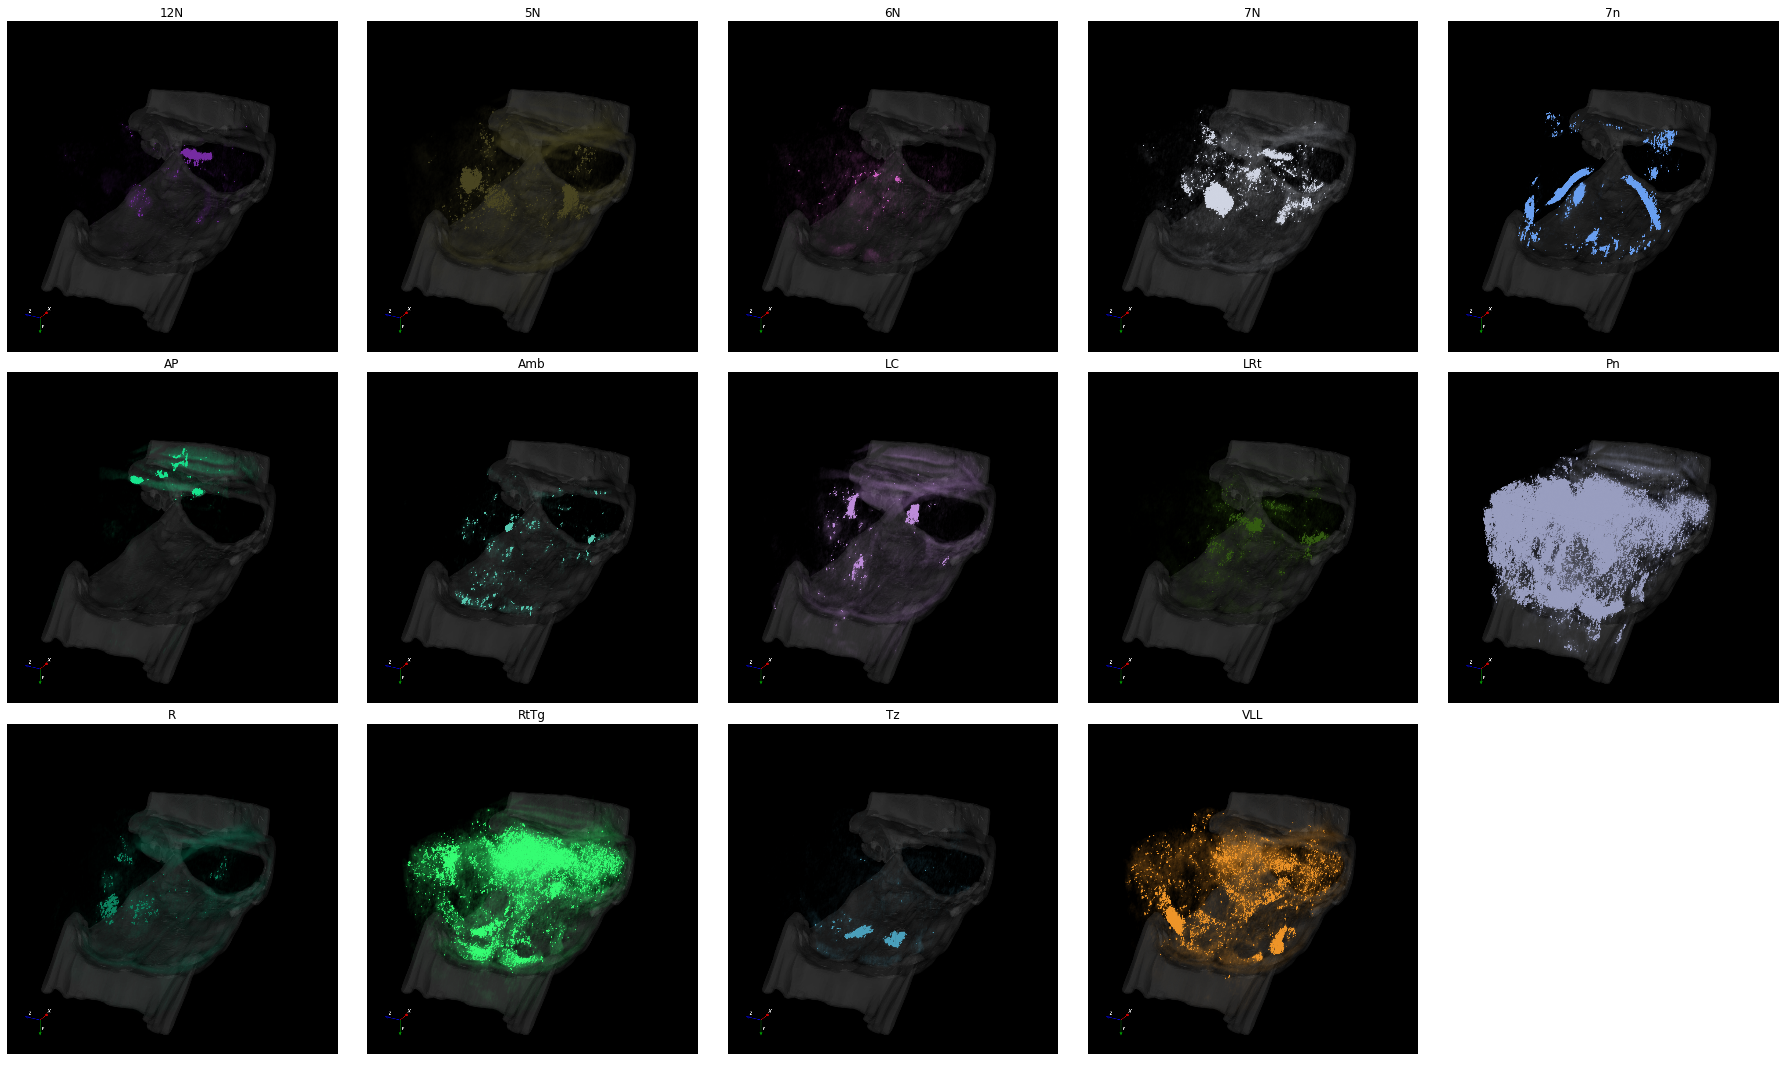

In [27]:
labels = [n for n in labels_unsided if n != 'outerContour' and n != 'sp5']
vizs = [imread((volume_dir + "/%(stack)s/scoreVolume_screenshots/%(stack)s_scoreVolume_%(name)s.png" % \
                           {'stack':stack, 'name':name})) for name in labels]
display_images_in_grids(vizs, 5, labels)